# PROJECT 7. 나랑 닮은 연예인을 찾아보자

## Step1. 사진 모으기
내 사진과 비교해 보고 싶은 연예인 사진을 모읍니다.
### (1) 내 사진 찍기
- 내 사진을 2장 이상 포함합니다.


my_img_list: ['셀카1.JPG', '셀카2.JPG']


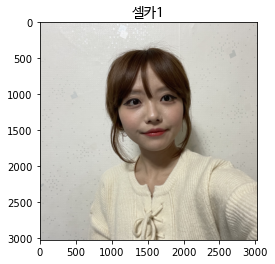

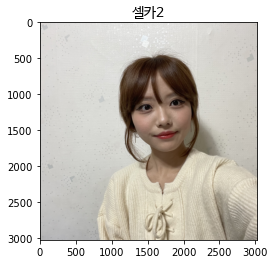

In [1]:
import os
from PIL import Image
import face_recognition
import cv2
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import re
%matplotlib inline

img_path = os.getenv('HOME')+'/aiffel/exploration/face_embedding/'    # 이미지 경로
my_img_list = os.listdir(img_path + "my_img/")    # 이미지 리스트
my_img_list.sort()

                     
print ("my_img_list: {}".format(my_img_list))    # 내 사진 파일이름 출력

fontprop = fm.FontProperties(fname = os.getenv('HOME')+'/aiffel/fonts/NanumBarunGothic.ttf', size=14)    # 폰트설정

# 내 사진 출력하기
for img in my_img_list:
    img_bgr = cv2.imread(img_path + "my_img/" + img, 1)    # openCV로 이미지 읽기, 1 : 컬러로 읽음
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # maplotlib 로 출력하기 위해 이미지 채널을 RGB 순으로 바꾸기
    
    title_name = re.sub("[.a-zA-Z]", "", img)
    plt.imshow(img_rgb)
    plt.title(title_name, fontproperties = fontprop)
    plt.show()


### (2) 비교할 연예인 사진 모으기
- 연예인 사진을 5장 이상 포함합니다.  
> 닮은 연예인 : 하연수, 주은(다이아), 유라(걸스데이)  
안닮은 연예인 : 다현(트와이스), 예지(itzy), 서현진  
아이돌 아이즈원 : 권은비, 사쿠라, 강혜원, 최예나, 이채연, 김채원, 김민주, 나코, 히토미, 조유리, 안유진 ,장원영

others_img_list: ['다현.jpg', '서현진.jpg', '예지.jpg', '유라.jpg', '주은.jpg', '하연수.jpg']


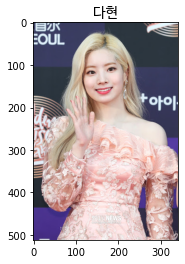

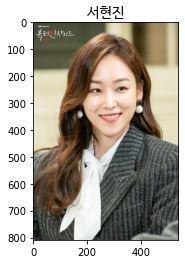

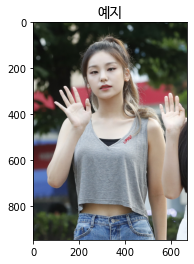

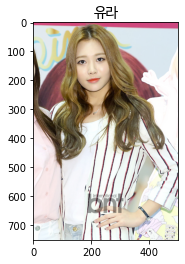

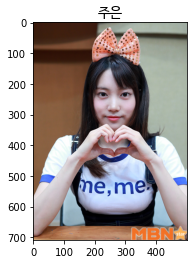

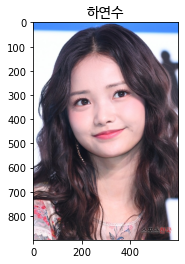

In [2]:
others_img_list = os.listdir(img_path + "others_img/")    # 이미지 리스트
others_img_list.sort()

print ("others_img_list: {}".format(others_img_list))    # 연예인 사진 파일이름 출력

# 연예인 사진 출력하기
for img in others_img_list:
    img_bgr = cv2.imread(img_path + "others_img/" + img, 1)    # openCV로 이미지 읽기, 1 : 컬러로 읽음
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # maplotlib 로 출력하기 위해 이미지 채널을 RGB 순으로 바꾸기
    
    title_name = re.sub("[.a-zA-Z]", "", img)
    plt.imshow(img_rgb)
    plt.title(title_name, fontproperties = fontprop)
    plt.show()


izone_img_list: ['강혜원.jpg', '권은비.jpg', '김민주.jpg', '김채원.jpg', '나코.jpg', '사쿠라.jpg', '안유진.jpg', '이채연.jpg', '장원영.jpg', '조유리.jpg', '최예나.jpg', '히토미.jpg']


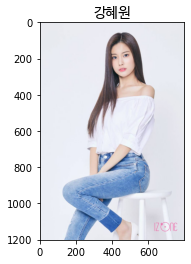

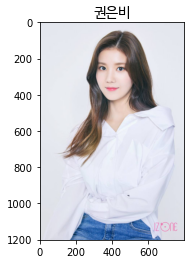

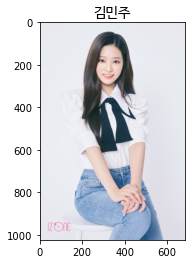

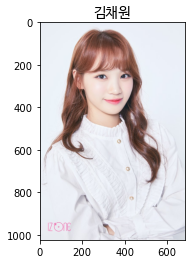

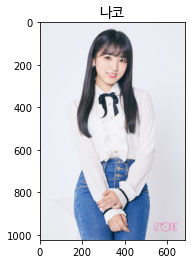

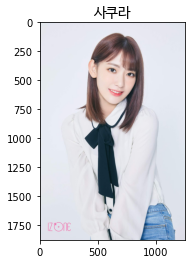

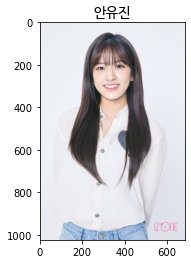

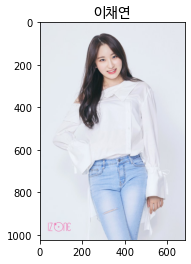

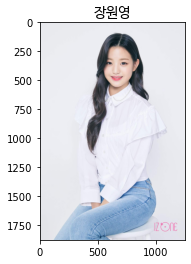

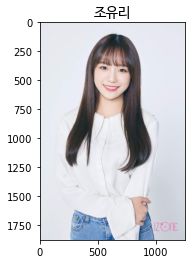

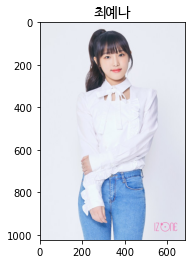

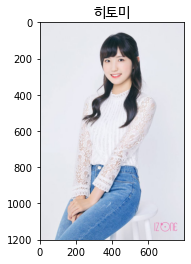

In [3]:
izone_img_list = os.listdir(img_path + "izone_img/")    # 이미지 리스트
izone_img_list.sort()

print ("izone_img_list: {}".format(izone_img_list))    # 연예인 사진 파일이름 출력

# 연예인 사진 출력하기
for img in izone_img_list:
    img_bgr = cv2.imread(img_path + "izone_img/" + img, 1)    # openCV로 이미지 읽기, 1 : 컬러로 읽음
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # maplotlib 로 출력하기 위해 이미지 채널을 RGB 순으로 바꾸기
    
    title_name = re.sub("[.a-zA-Z]", "", img)
    plt.imshow(img_rgb)
    plt.title(title_name, fontproperties = fontprop)
    plt.show()


## Step2. 얼굴 영역 자르기
임베딩 추출을 위해서 얼굴 영역을 잘라줍니다. 
> 얼굴 영역 자르기 : **get_cropped_face(image_file)** 

>  자른 이미지 저장하기: **Image.fromarray(cropped_face).save(path_to_save)**

============================== 내 얼굴 영역 ==============================


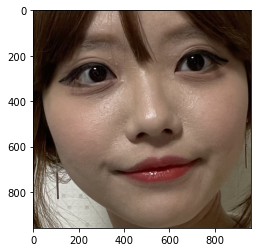

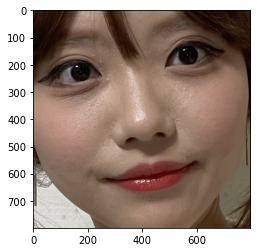

============================= 연예인 얼굴 영역 =============================


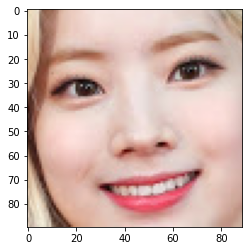

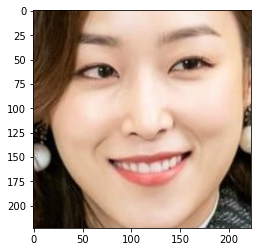

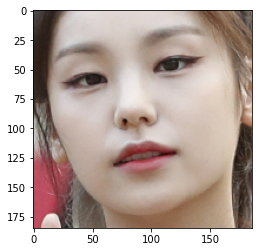

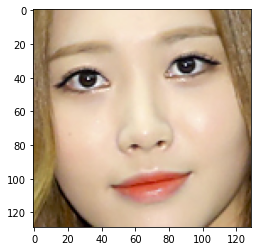

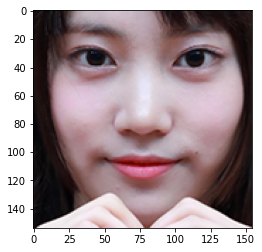

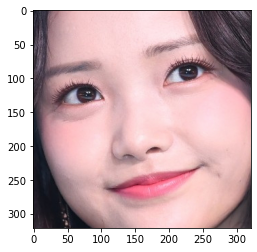

============================ 아이즈원 얼굴 영역 ============================


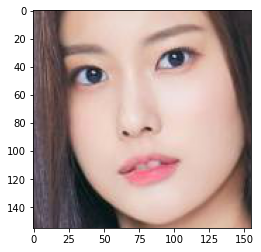

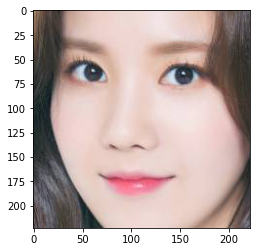

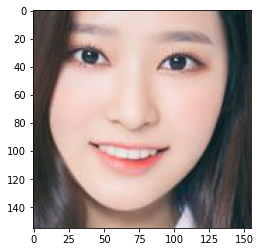

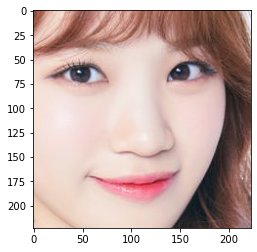

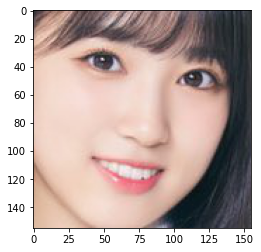

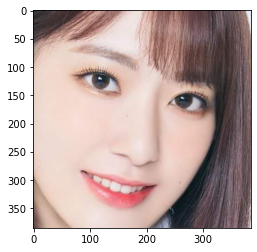

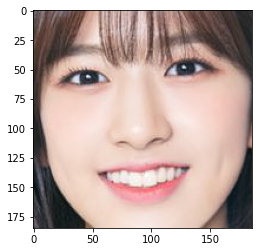

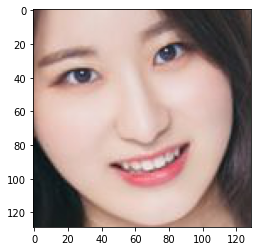

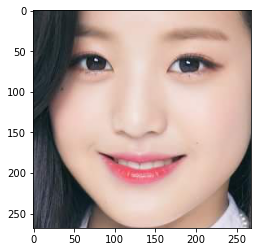

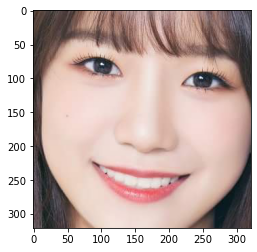

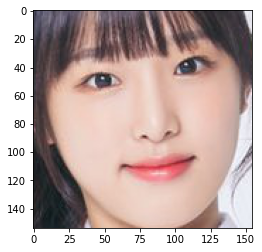

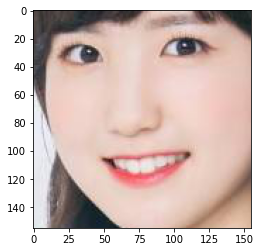

In [4]:
import face_recognition
import os
from PIL import Image

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

# 내 사진 출력하기
print("============================== 내 얼굴 영역 ==============================")
for img in my_img_list:
    cropped_face = get_cropped_face(img_path + "my_img/" + img)
    
    # 자른 이미지 출력
    plt.imshow(cropped_face)
    plt.show()
    
    # 자른 이미지 저장
    pillow_image = Image.fromarray(cropped_face)    
    pillow_image.save(img_path + "my_cropped_img/" + os.path.splitext(img)[0] + ".jpg")
    
# 연예인 사진 출력하기    
print("============================= 연예인 얼굴 영역 =============================")
for img in others_img_list:
    cropped_face = get_cropped_face(img_path + "others_img/" + img)
    
    # 자른 이미지 출력
    plt.imshow(cropped_face)
    plt.show()
    
    # 자른 이미지 저장
    pillow_image = Image.fromarray(cropped_face)
    pillow_image.save(img_path + "others_cropped_img/" + os.path.splitext(img)[0] + ".jpg")
    
# 아이즈원 사진 출력하기    
print("============================ 아이즈원 얼굴 영역 ============================")
for img in izone_img_list:
    cropped_face = get_cropped_face(img_path + "izone_img/" + img)
    
    # 자른 이미지 출력
    plt.imshow(cropped_face)
    plt.show()
    
    # 자른 이미지 저장
    pillow_image = Image.fromarray(cropped_face)
    pillow_image.save(img_path + "izone_cropped_img/" + os.path.splitext(img)[0] + ".jpg")


## Step3. 얼굴 영역의 임베딩 추출하기
잘린 이미지를 통해 임베딩을 추출합니다. 나의 임베딩과 연예인의 임베딩은 구분할 수 있게 따로 저장합니다.
> **face_recognition.face_encodings(cropped_face)**

In [5]:
import copy
# 사진 벡터화하기

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

# 파일리스트에 있는 것 딕셔너리로 만들어서 벡터화 하기

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    file_list.sort()
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
          # 이미지 파일명에서 확장자를 제거한 이름
          embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

# 내 사진 임베딩
my_embedding_dict = get_face_embedding_dict(img_path + "my_cropped_img/")

# 연예인 사진 임베딩
others_embedding_dict = get_face_embedding_dict(img_path + "others_cropped_img/")

# 아이즈원 사진 임베딩
izone_embedding_dict = get_face_embedding_dict(img_path + "izone_cropped_img/")

my_embedding_dict.update(others_embedding_dict) 
my_embedding_dict.update(izone_embedding_dict)
embedding_dict = my_embedding_dict.copy()

for key, value in embedding_dict.items():
    print(key)
    print(f": {value}")


셀카1
: [-0.09467673  0.02580981  0.01458857 -0.10282036 -0.13524026 -0.06800696
 -0.08271223 -0.07395586  0.14419098 -0.17653061  0.16301586 -0.05914171
 -0.14006522 -0.05847717 -0.04184101  0.24986459 -0.21546224 -0.17669006
 -0.05425685  0.03549063  0.11000101 -0.00252627  0.00740241  0.05454984
 -0.09514121 -0.33538201 -0.10670483 -0.05615696 -0.01583039 -0.05852631
  0.0008638   0.08600888 -0.17034867  0.00155517  0.02472987  0.12518074
 -0.00208876 -0.09177347  0.13548167  0.04060503 -0.33701399  0.05291235
  0.05761044  0.22193961  0.1960126  -0.01757567  0.04235175 -0.14642772
  0.13666786 -0.17666824 -0.00829282  0.10145359  0.04826673  0.04418154
  0.05329739 -0.10358971  0.08907441  0.13921285 -0.14100261  0.02680678
  0.10140868 -0.07946187  0.01316076 -0.10556426  0.18874773  0.06461442
 -0.12121028 -0.21804194  0.0924764  -0.14780332 -0.09289473  0.13821711
 -0.16311125 -0.1920031  -0.32467306 -0.05520442  0.37721887  0.10130966
 -0.14101951  0.06233485  0.02544646 -0.00247

## Step4. 모은 연예인들과 비교하기
모은 연예인 사진들과 자신의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 봅니다.
### (1) 얼굴 임베딩 사이의 거리 측정하기
나의 임베딩과 연예인의 임베딩 사이의 거리는 L2 distance로 계산합니다.
> **np.linalg.norm(나의 임베딩 - 연예인의 임베딩, ord=2)**

In [6]:
import numpy as np

# 두 사람의 얼굴 임베딩 사이의 거리(L2 distance)를 구하는 형태입니다.
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

my = list(embedding_dict.keys())[0]


### (2) 가장 닮은꼴 연예인 찾아보기
위에서 구현한 코드를 바탕으로 나와 닮은 연예인을 순서대로 찾아봅니다. 

In [7]:
def get_nearest_face(name, top=19):
    izone = ["권은비", "사쿠라", "강혜원", "최예나", "이채연", "김채원", "김민주", "나코", "히토미", "조유리", "안유진" ,"장원영"]
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    others_dict = dict()
    izone_dict = dict()
    
    for i in range(top+1):
        if i == 0 or i == 1 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            if sorted_faces[i][0] in izone:
                izone_dict[sorted_faces[i][0]] = sort_key_func(sorted_faces[i][0])
            else:
                others_dict[sorted_faces[i][0]] = sort_key_func(sorted_faces[i][0])
      
    return sorted_faces, others_dict, izone_dict
            
# 나와 가장 닮은 사람은 누굴까요?
sorted_faces, others_dict, izone_dict = get_nearest_face(my)

# 연예인
count = 1
print("======================= 연예인 닮은꼴 순위 =======================")
for key, value in others_dict.items():
    print('순위 {} : {}, 거리({})'.format(count, key, value))
    count += 1    
print("==============================================================")
print()

# 아이즈원
count = 1
print("====================== 아이즈원 닮은꼴 순위 ======================")
for key, value in izone_dict.items():
    print('순위 {} : {}, 거리({})'.format(count, key, value))
    count += 1
print("==============================================================")
print()


======================= 연예인 닮은꼴 순위 =======================
순위 1 : 하연수, 거리(0.350978754367562)
순위 2 : 유라, 거리(0.3526934567049866)
순위 3 : 주은, 거리(0.3555298404938026)
순위 4 : 다현, 거리(0.42110244268167035)
순위 5 : 예지, 거리(0.45759180627320645)
순위 6 : 서현진, 거리(0.47000967404625854)

====================== 아이즈원 닮은꼴 순위 ======================
순위 1 : 조유리, 거리(0.3407285118850019)
순위 2 : 장원영, 거리(0.36916774123853624)
순위 3 : 권은비, 거리(0.41301432650225295)
순위 4 : 나코, 거리(0.4371591637852983)
순위 5 : 최예나, 거리(0.46210357627146853)
순위 6 : 김민주, 거리(0.4621847159993518)
순위 7 : 강혜원, 거리(0.4649985653322937)
순위 8 : 김채원, 거리(0.4738037429249278)
순위 9 : 안유진, 거리(0.47656858105897715)
순위 10 : 히토미, 거리(0.47692179099862086)
순위 11 : 이채연, 거리(0.4816630297525518)
순위 12 : 사쿠라, 거리(0.489989868959306)



## Step5. 다양한 재미있는 시각화 시도해보기
step2 단계에서 저장한 자른 이미지사진을 활용하여 재미있는 시각화를 시도해봅니다.  
나의 사진을 점점 투명하게 하고, 동시에 연예인 사진을 점점 선명하게 하는 gif를 만들어서 변해가는 과정을 시각화합니다.

In [8]:
import cv2 as cv

my_img = sorted_faces[0]

img1 = cv.imread(img_path + "my_cropped_img/" + my_img[0] + ".jpg")
img1 = cv.resize(img1, (300, 300))

# 연예인 gif 저장
for img in list(others_dict.keys())[:3]:
    a = 0.0
    img2 = cv.imread(img_path + "others_cropped_img/" + img + ".jpg")
    img2 = cv.resize(img2, (300, 300))
    
    for i in range(10):  
        b = 1.0 - a
        dst = cv.addWeighted(img2, a, img1, b, 0)
        cv2.imwrite(img_path + "img_gif/temp/" + str(i) + ".jpg", dst)
        a = a + 0.1
        
    os.system('convert -delay 25 -loop 0 {}img_gif/temp/*.jpg {}img_gif/{}.gif'.format(img_path, img_path, img))

# 아이즈원 gif 저장
izone_name = list(izone_dict.keys())[0]
a = 0.0
img2 = cv.imread(img_path + "izone_cropped_img/" + izone_name + ".jpg")
img2 = cv.resize(img2, (300, 300))
    
for i in range(10):  
    b = 1.0 - a
    dst = cv.addWeighted(img2, a, img1, b, 0)
    cv2.imwrite(img_path + "img_gif/temp/" + str(i) + ".jpg", dst)
    a = a + 0.1
        
os.system('convert -delay 25 -loop 0 {}img_gif/temp/*.jpg {}img_gif/{}.gif'.format(img_path, img_path, izone_name))
    

0

**당신과 가장 닮은 유명인은 ...**  
## 하연수
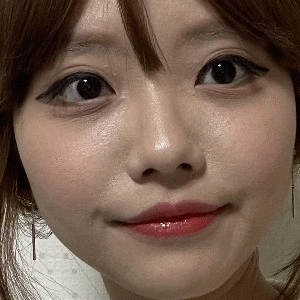 
</br>  
</br>  

**당신과 가장 닮은 유명인은 ...**  
## 걸스데이 유라
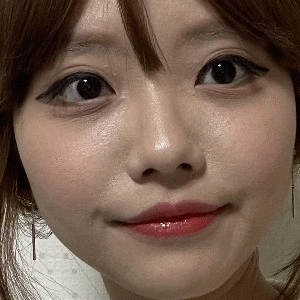
</br>  
</br>  

**당신과 가장 닮은 유명인은 ...**  
## 다이아 주은
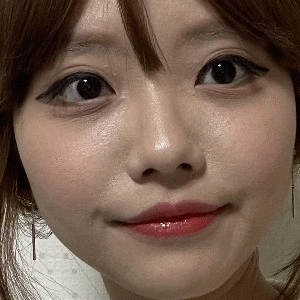
</br>  
</br>  

**당신과 가장 닮은 아이즈원은 ...**  
## 조유리
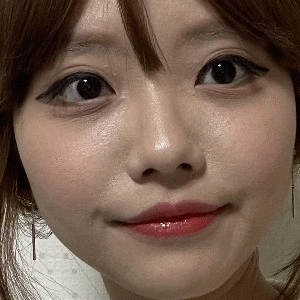
</br>  
</br>  

## [ 결과 - 루브릭 ]
#### 1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.
- 닮은꼴 순위, 이름, 임베딩 거리를 포함한 랭킹 리스트가 정렬되어 출력되었습니다 :)

#### 2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.  
- L2 distance 를 활용하여 저와 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈습니다 :)
  
#### 3. 다양하고 재미있는 결과 시각화를 시도하였다.  
- 시각화 도구를 이용해서 재미있는 결과 시각화를 구현하였습니다. :)
